In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# O'Reilly

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [6]:
xb = np.c_[np.ones((100,1)), X]

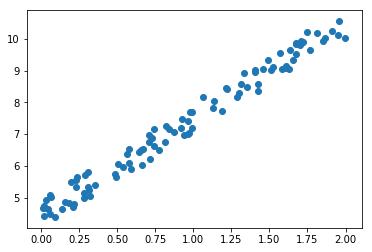

In [7]:
plt.scatter(X, y)

In [8]:
alpha = 0.1
n_iters = 100
N = xb.shape[0]

#theta = np.random.rand(xb.shape[1], 1)
theta = np.ones((xb.shape[1], 1))
theta

array([[1.],
       [1.]])

In [9]:
for step in range(n_iters):
    gradients = 2/N * xb.T.dot(xb.dot(theta) - y.reshape(-1,1))
    theta = theta - alpha * gradients

In [20]:
theta

array([[4.45392509],
       [3.055927  ]])

In [21]:
lr = LinearRegression().fit(X, y)
lr.coef_, lr.intercept_

(array([[3.0329217]]), array([4.47967888]))

# Own

In [22]:
from sklearn.metrics import mean_squared_error

In [32]:
# data
X, y = make_regression(100000, 3)

In [33]:
X[:5]

array([[ 1.01708407, -0.30916718,  0.51675762],
       [ 0.67547534,  0.84956804, -1.89146088],
       [ 0.47789659,  1.07887494,  0.7558294 ],
       [-0.8937611 , -0.26430952,  0.75807542],
       [ 0.25232805,  1.50425666, -0.7498876 ]])

In [34]:
y[:5]

array([ 91.2554619 ,  30.24041374,  52.55704993, -63.65236688,
        12.86192617])

In [35]:
class Linreg():
    
    """ Linear Regression """
    
    def __init__(self, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
        self.input_dim = None
        self.coefs = None
        self.intercept = None
        self.fitted = False

    def fit(self, X, y, optimization='normal', verbose=None):
        self.input_dim = X.shape[1]
        
        # add 1s
        xb = np.c_[np.ones((X.shape[0],1)), X]
        
        # initiate coefs
        theta = np.ones((xb.shape[1], 1))
        
        # get m
        m = xb.shape[0]
        
        # normal equation
        if optimization=='normal':
            if m < 50000:
                theta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
            else:
                print(f"Dataset is too large ({m} rows) for normal optimization, switching to gradient descent")
                optimization = 'gradient_descent'
        
        # gradient descent
        if optimization=='gradient_descent':
            for step in range(self.n_iter):

                # compute error
                error = self.__error(xb, y, theta)

                # mse
                mse = (error ** 2).mean()

                # update coefs            
                theta = theta - (self.alpha * (1 / m) * np.dot(xb.T, error))
            
        # fit instances
        self.coefs = theta[1:]
        self.intercept = theta[0]
        self.fitted = True
        return self
        
    
    @staticmethod
    def __error(X, y, theta):
        return X.dot(theta) - y.reshape(-1,1)
            
    def predict(self, X):
        if not self.fitted:
            raise Exception("Linreg is not yet fitted.")
        if len(X.shape) == 1:
            X = X.reshape(1,-1)
        if X.shape[1] != self.input_dim:
            raise Exception(f"Input data shape must be equal to fit data shape {self.input_dim}")
        return X.dot(self.coefs)
                

    def __repr__(self):
        if self.fitted:
            return f"coefficients: {self.coefs}, \n\n intercept: {self.intercept}"
        else:
            return "Linreg"

In [36]:
l = Linreg(0.1, 10000)
l

Linreg

In [37]:
l.fit(X, y)

Dataset is too large (100000 rows) for normal optimization, switching to gradient descent


coefficients: [[82.937186  ]
 [ 1.84670454]
 [14.45999333]], 

 intercept: [-4.68283202e-17]

In [38]:
x = LinearRegression(fit_intercept=True).fit(X, y)

In [39]:
x.coef_, x.intercept_

(array([82.937186  ,  1.84670454, 14.45999333]), -5.030698080332741e-16)